In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
plt.rcParams["figure.figsize"] =(12,6)
import warnings 
warnings.filterwarnings("ignore")



Temperature (°C): The air temperature.
RH (Relative Humidity): The amount of moisture in the air relative to its maximum capacity at that temperature.
Ws (Wind Speed): The speed of the wind.
Rain: The amount of rainfall.
FFMC (Fine Fuel Moisture Code): A numerical rating of the moisture content of litter and other cured fine fuels.
DMC (Duff Moisture Code): A numerical rating of the moisture content of decomposed organic matter underneath the litter.
DC (Drought Code): A numerical rating of the moisture content of deep, compact organic layers.
ISI (Initial Spread Index): A numerical rating of the expected rate of fire spread.
BUI (Buildup Index): A numerical rating of the total fuel available for combustion.
FWI (Fire Weather Index): A numerical rating of fire intensity.


In [3]:
df=pd.read_csv("/Users/saikarthik/Desktop/Algerian/Algerian_forest_fires_cleaned_dataset.csv")

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
df=df.drop(["day","month","year"],axis=1)


In [9]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [10]:
df[ 'Classes']=np. where(df[ 'Classes']. str.contains("not fire"),0,1)

In [14]:
df["Classes"].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [15]:
x=df.drop('FWI', axis=1)
y=df['FWI']

In [16]:
x

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [17]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [23]:
df.shape

(243, 12)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
xtrain , xtest , ytrain , ytest = train_test_split(x,y,test_size=0.25,random_state=42)

In [20]:
xtrain.shape , xtest.shape


((182, 11), (61, 11))

In [22]:
ytrain.shape ,ytest.shape

((182,), (61,))

<Axes: >

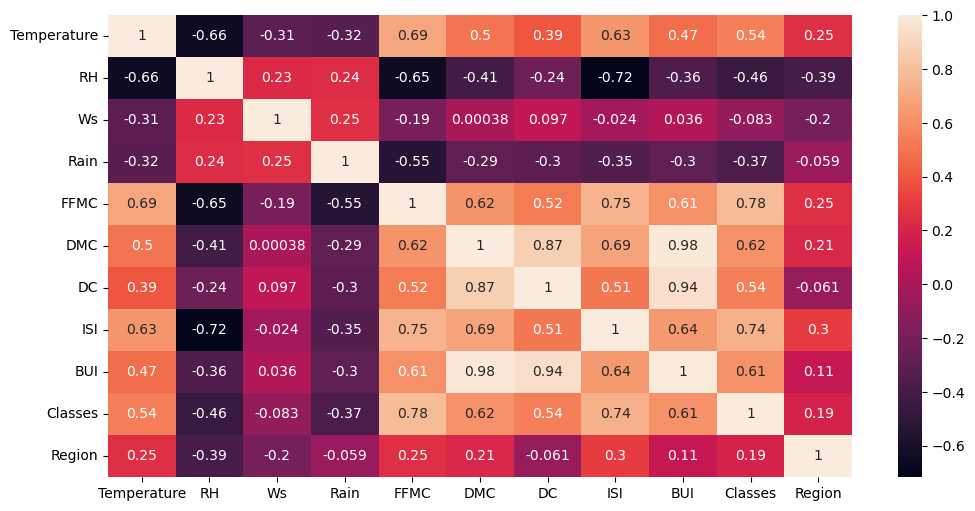

In [28]:
sns.heatmap(xtrain.corr(),annot=True)

In [29]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr


In [31]:
corrf=correlation(xtrain,0.85)

In [32]:
xtrain.drop(corrf,axis=1,inplace=True)

In [ ]:
xtest.drop(corrf,axis=1,inplace=True)